In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [114]:
df = pd.read_csv('data.csv')

t_data = df['Time (s)'].values
position_data = df['Position (m)'].values

Optimal k: 31.673922825614422
Optimal n: 3.7329931361945548


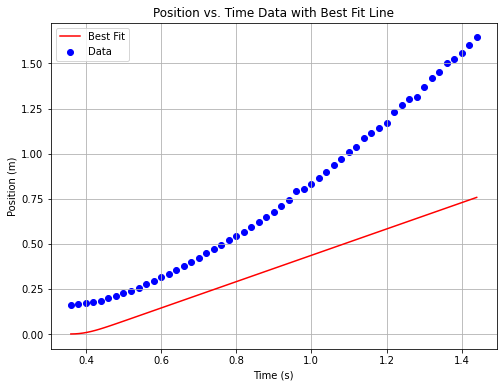

In [115]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the differential equation for acceleration
def acceleration(t, v, k, n):
    return 9.8 - k * v**n

# Solve the differential equation to get the velocity as a function of time
def solve_velocity(k, n, t_eval):
    def velocity(t, y):
        v = y[0]
        dydt = [acceleration(t, v, k, n)]
        return dydt

    t_span = (t_eval[0], t_eval[-1])  # Adjust the time span
    initial_conditions = [0]  # Initial velocity is 0 m/s

    solution = solve_ivp(velocity, t_span, initial_conditions, t_eval=t_eval)
    return solution.t, solution.y[0]

# Define a function to fit the position vs. time data and optimize k and n
def fit_position_data(t, y):
    def position_function(t, k, n):
        _, velocity = solve_velocity(k, n, t)
        position = np.trapz(velocity, t)
        return position

    # Perform curve fitting to find the optimal k and n within the specified ranges
    popt, _ = curve_fit(position_function, t, y, bounds=([0, 1], [100, 5]))  # Bounds for k and n

    return popt


# Fit the data and optimize k and n within the specified ranges
optimal_k, optimal_n = fit_position_data(t_data, position_data)

# Print the optimized parameters
print(f"Optimal k: {optimal_k}")
print(f"Optimal n: {optimal_n}")

# Generate the best-fit line using the optimized parameters
best_fit_t = np.linspace(min(t_data), max(t_data), 100)
best_fit_k, best_fit_n = optimal_k, optimal_n
_, best_fit_velocity = solve_velocity(best_fit_k, best_fit_n, best_fit_t)
best_fit_position = np.zeros_like(best_fit_t)

for i in range(len(best_fit_t)):
    best_fit_position[i] = np.trapz(best_fit_velocity[:i+1], best_fit_t[:i+1])

# Plot the data and best-fit line
plt.figure(figsize=(8, 6))
plt.scatter(t_data, position_data, label="Data", color='blue')
plt.plot(best_fit_t, best_fit_position, label="Best Fit", color='red')
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.title("Position vs. Time Data with Best Fit Line")
plt.grid(True)
plt.show()
